<center><img src="BISA.png", width=300, height=150>
<br>
<center><h1>Introduction to Python for Data Science</h1></center>
<center><h2>Activity 2: Intro to Data Visualisation</h2></center>
<center>Materials made by Jeffrey Lo, for the Python Workshop on 12 September, 2018.</center>
<br>

In this section, we will introduce Pandas and Seaborn, which builds on top of NumPy and Matplotlib, respectively. We will use a practical approach by using a real dataset from Kaggle (a data science competition platform). I have simplified and cleaned the dataset included in the ZIP folder, originally downloaded from Kaggle, for the purpose of this introductory workshop.


## Bike Sharing Dataset

More info here: https://www.kaggle.com/marklvl/bike-sharing-dataset/home

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system in Washington, DC with the corresponding weather and seasonal information.

## Importing Modules/Packages

Recall from activity 1 that we need to import our extra modules and packages first.

We will use NumPy, Pandas, Matplotlib and Seaborn. The last line is a technicality, telling Python to show the graphs in-line.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Pandas

We will start by using some of the functionalities of Pandas. You can think of Pandas as one that gives some functionalities of Excel.

### Importing data

`pd.read_csv` will read the CSV file and store the dataset in the variable we named `data`. The file has to be in the same directory (folder) as this notebook, otherwise you can use subdirectories and so on.

N.b If it's an Excel file, you can use `pd.read_excel`.

In [2]:
data = pd.read_csv("bike_sharing_data_by_day_simplified.csv")

### Getting to know your dataset

Below, it is clear that Pandas dataframe resembles Excel worksheet, except you cannot edit them (you would need to do this via coding).

We call `.head()` to show the first 5 rows.

In [3]:
data.head()

,date,season,year,month,holiday,weekday,weather,temperature,humidity,windspeed,casual,registered,total_count
0,1/01/2011,Spring,2011,1,0,Sun,Cloudy,14.11,80.58,10.75,331,654,985
1,2/01/2011,Spring,2011,1,0,Mon,Cloudy,14.90,69.61,16.65,131,670,801
2,3/01/2011,Spring,2011,1,0,Tues,Clear,8.05,43.73,16.64,120,1229,1349
3,4/01/2011,Spring,2011,1,0,Wed,Clear,8.20,59.04,10.74,108,1454,1562
4,5/01/2011,Spring,2011,1,0,Thurs,Clear,9.31,43.70,12.52,82,1518,1600


**Activities:**

- You can use `.tail()` to show the last 5 rows.
- You can specify the number of rows to display by inputting a parameter e.g. `.head(12)`.

You can also call `data.shape` to output the number of rows and columns, respectively.

N.b. in machine learning, rows are called instances and columns are called features.

In [4]:
data.shape #number of rows, columns

(731, 13)

### Descriptive Statistics

Descriptive statistics provide simple but useful summaries about the data. In practice, it is essentially not possible to look at every single data row. It is mainly used in exploratory data analysis (EDA) in the data science process.

You can start by looking at the number of data in each column - that will indicate whether or not there are missing data. In this dataset, we know that there are 731 rows and every column has 731 fields, thus there is no missing data.

We can also use descriptive statistics to look for outliers and distribution of the data (min, 25%, median, 75%, max). But is there a better way to look for outliers than looking at this table?

In [5]:
data.describe().round(1)

,year,month,holiday,temperature,humidity,windspeed,casual,registered,total_count
count,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0,731.0
mean,2011.5,6.5,0.0,20.3,62.8,12.8,848.2,3656.2,4504.3
std,0.5,3.5,0.2,7.5,14.2,5.2,686.6,1560.3,1937.2
min,2011.0,1.0,0.0,2.4,0.0,1.5,2.0,20.0,22.0
25%,2011.0,4.0,0.0,13.8,52.0,9.0,315.5,2497.0,3152.0
50%,2012.0,7.0,0.0,20.4,62.7,12.1,713.0,3662.0,4548.0
75%,2012.0,10.0,0.0,26.9,73.0,15.6,1096.0,4776.5,5956.0
max,2012.0,12.0,1.0,35.3,97.2,34.0,3410.0,6946.0,8714.0


### Distribution

With most statistical analysis, another way to get to know your data is to visually look at the distribution of data. For simplicity, we will just look at the response variable (in this case `total_count`, or daily count of bike riders). The below plot agrees with the descriptive statistics of `total_count` (above) - the minimum is ~0, mean is ~4500, max is around ~8000+.

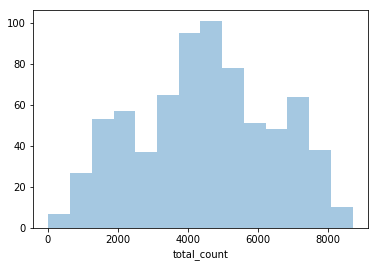

In [6]:
sns.distplot(data['total_count'], kde=None)
plt.show()

**Activity:**

- Try showing the distribution of casual riders over 2011-12.

### Time Series Plot (Matplotlib)

For this particular dataset which is time-series based, clearly we should start by looking at the general trend of the number of bike shares over 2011-12. We can use the `.plot` function to plot the data from a column, if the data is time series.

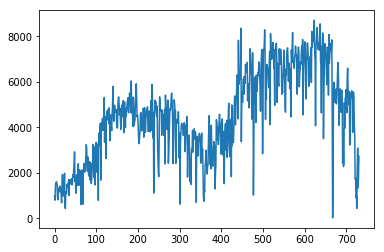

In [7]:
plt.plot(data['total_count'])
plt.show()

**Activities:**

- Oftentimes it is best practice to label your graph, by calling `.title`, `.xlabel`, `.ylabel` functions from Matplotlib. Try adding this line: `plt.title("Time Series Plot of Daily Bike Riders")`
- We can add `fig = plt.figure(figsize=(8,4))` to store the figure and change the figure size and any other parameters from the documentation [here](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html).
- For aesthetics purposes, it is common to remove the top and right axes by adding a new line `sns.despine()`.

## Seaborn - More Visualisations

There are many types of plots available, you can see from [Seaborn's Example gallery](https://seaborn.pydata.org/examples/index.html). Here are just some of them:
- Barcharts (`sns.barplot`)
- Boxplots (`sns.boxplot`)
- Distribution plots (`sns.distplot`)
- Regression plots (`sns.regplot`)
- ... even Violin plots (`sns.violinplot`)

### Barplots

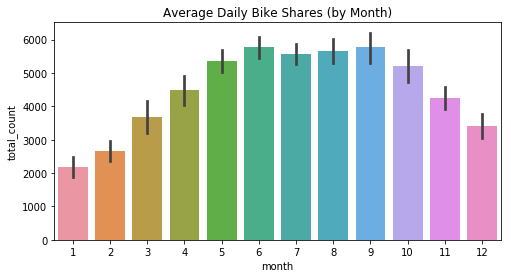

In [8]:
fig = plt.figure(figsize=(8,4))
sns.barplot(data=data, x='month', y='total_count') #confidence interval turned off
plt.title("Average Daily Bike Shares (by Month)") #from matplotlib
plt.show()

**Activities:**

- There are many parameters for each function... simply Google `sns.barplot` for Seaborn documentation. Open the [parameter list for barplots](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- When the parameters are not specified, all the possible parameters (set by Seaborn) is set to default or none.
- For barplots (and some other ones), one useful parameter is `hue` where you can specify an additional feature to be included in addition to `x` and `y`. Try adding `hue='year'` within `sns.barplot()`
- The black vertical lines are the confidence intervals. We probably don't need it here, you can turn it off by adding `ci=None` within `sns.barplot()`.

### Boxplots and more

What if you want to visaulise the total bike shares against weekday? Would a barchart (barplot) work well here... or not? Try changing the code above and see!

If we use a barplot, we can find only find the average daily bike shares by day of week. That is, it is essentially just 7 numbers plotted on a graph.

Boxplots do more than that... they show the distribution, or variability of the data corresponding to each weekday as below. You can see that Wednesdays has a lower variability than other days, such as Thursdays and Sundays.

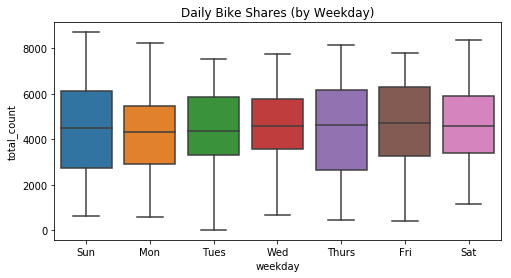

In [9]:
fig = plt.figure(figsize=(8,4))
sns.boxplot(data=data, x='weekday', y='total_count')
plt.title("Daily Bike Shares (by Weekday)")
plt.show()

**Activities:**

- Again, you can check what other parameters you can use.... here is the [documentation for boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
- For boxplots, the middle horizontal line is the 50% quartile, not the mean. Thus, it is useful to show the mean by adding a new parameter `showmeans=True`.
- What happens when you change from `sns.boxplot` to `sns.swarmplot`... what extra information does this show? What about `sns.violinplot`?
- Try plotting weather against total_count, by replacing `weekday` with `weather` in the code above.

### Regression and Scatterplots

You may recall from intro stats about regression plots, which is basically a scatterplot with a line of best fit (for simple linear regression). Seaborn can handle this as well!

Text(0.5,1,'Temperature vs Daily Bike Shares (2011-12)')

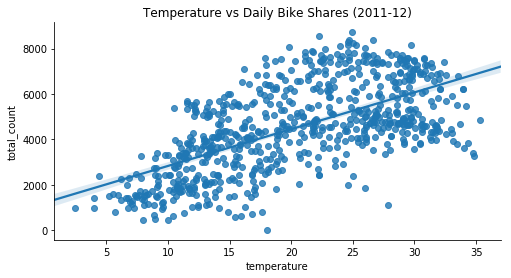

In [10]:
fig = plt.figure(figsize=(8,4))
sns.regplot(data=data, x='temperature', y='total_count')
sns.despine()
plt.title("Temperature vs Daily Bike Shares (2011-12)")

**Activities:**

- To turn into a scatterplot, you can simply add a parameter: `fit_reg=False`
- Instead of temperature, try and find if there is a correlation between windspeed and total bike shares.
- What happens when you put a dummy variable (such as the column "holiday" which only takes a value of 0 and 1)? Does a regression plot make sense here, or not?